# **Global Sea Level Variations (mm)**

# GROUP 10
### - Abhinav Merugu
### - Hamsaraj Tupthi
### - Anchit Raghuwanshi

## Importing all libraries

In [3141]:
import numpy as np
import pandas as pd
import seaborn as sns
import fbprophet as fbprophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt 


## Importing dataset

In [3142]:
gslr = pd.read_csv('global_sea_level_rise.csv').drop(columns=['Unnamed: 0'])
gslr = gslr[['date', 'gmsl', 'co2ppm', 'gt_anomalies']]
gslr['date'] = pd.to_datetime(gslr['date'])
gslr.to_csv("global_sea_level_rise.csv")

In [3143]:
gslr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          333 non-null    datetime64[ns]
 1   gmsl          333 non-null    float64       
 2   co2ppm        333 non-null    float64       
 3   gt_anomalies  333 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 10.5 KB


In [3144]:
gslr.columns

Index(['date', 'gmsl', 'co2ppm', 'gt_anomalies'], dtype='object')

In [3145]:
gslr.head(5)

,date,gmsl,co2ppm,gt_anomalies
0,1993-01-01,-48.0,356.37,0.36
1,1993-02-01,-46.6,356.40,0.38
2,1993-03-01,-46.3,356.51,0.41
3,1993-04-01,-43.8,356.66,0.31
4,1993-05-01,-45.7,356.72,0.35


In [3146]:
gslr.describe()

,gmsl,co2ppm,gt_anomalies
count,333.000000,333.000000,333.000000
mean,-0.001802,382.417357,0.636637
std,28.678059,16.436167,0.212559
min,-48.000000,356.370000,0.070000
25%,-23.300000,368.360000,0.490000
50%,-3.800000,381.740000,0.630000
75%,22.400000,396.010000,0.770000
max,54.400000,412.840000,1.310000


## Since the dataset was maintained by NASA, there was no need of data cleaning.

## EAD

array([[<AxesSubplot:title={'center':'date'}>,
        <AxesSubplot:title={'center':'gmsl'}>],
       [<AxesSubplot:title={'center':'co2ppm'}>,
        <AxesSubplot:title={'center':'gt_anomalies'}>]], dtype=object)

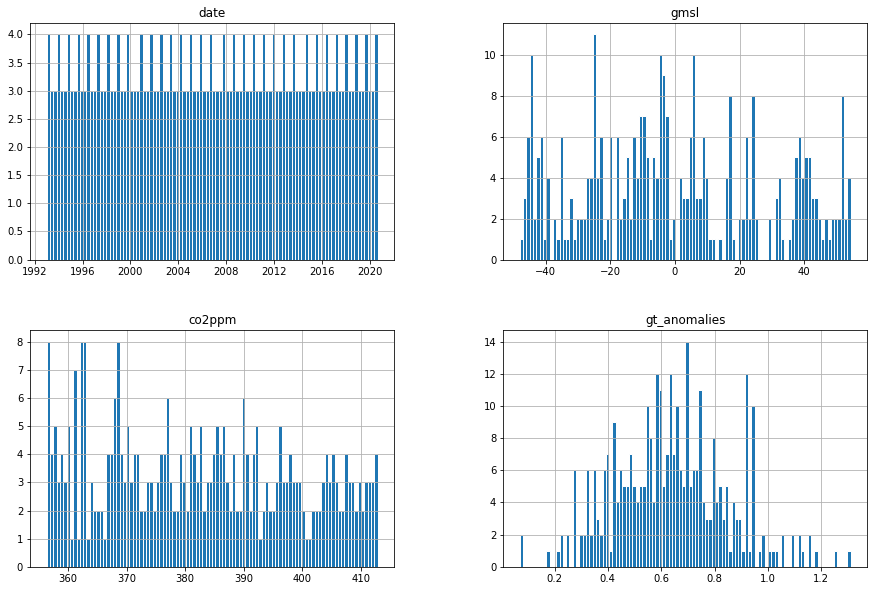

In [3147]:
gslr.hist(bins = 100,figsize=(15,10), edgecolor = 'white')

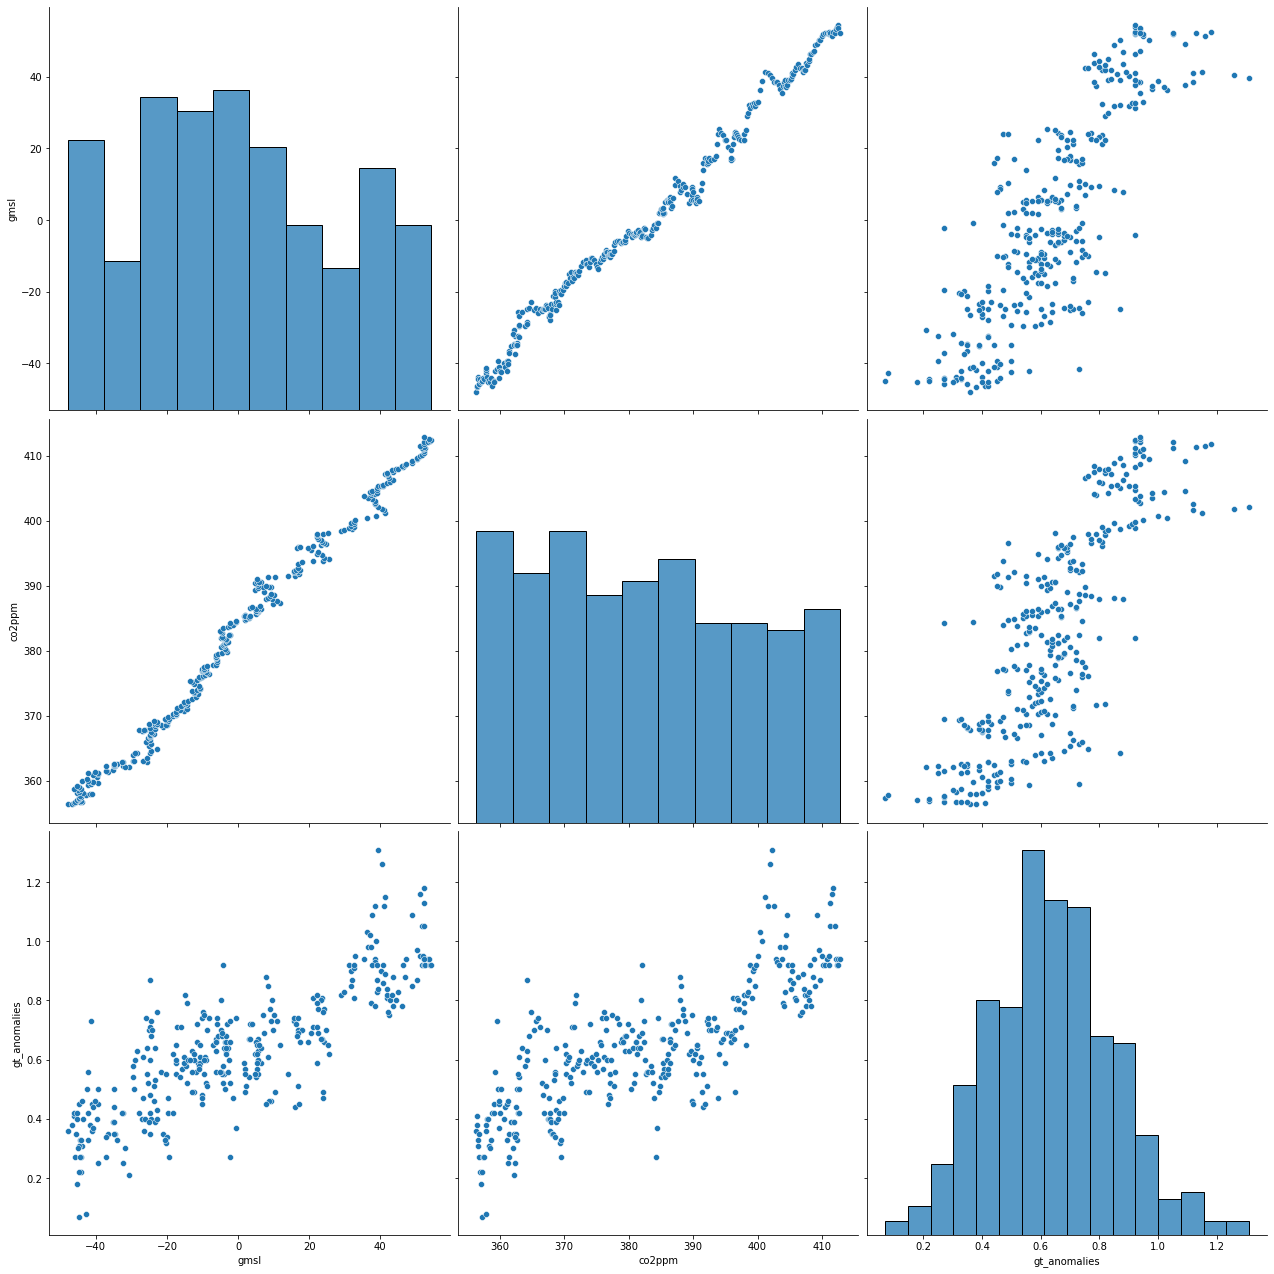

In [3148]:
sns.pairplot(gslr, height=6)

### Plot showing how the data looks.

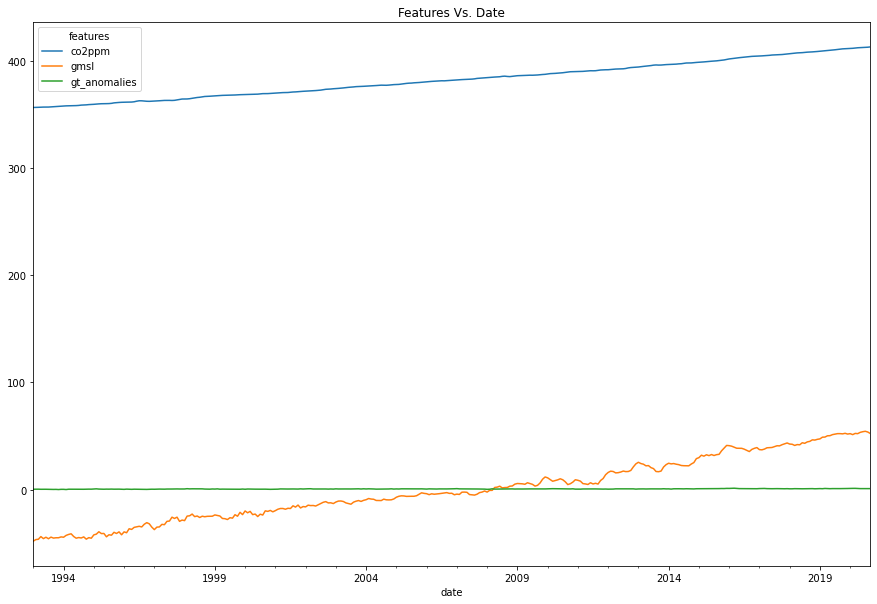

In [3149]:
gslr.plot(x='date',y=['co2ppm','gmsl','gt_anomalies'],figsize=(15, 10))
plt.legend(title='features')
plt.title('Features Vs. Date')
print()

## Heatmap for coorelation matrix

<AxesSubplot:>

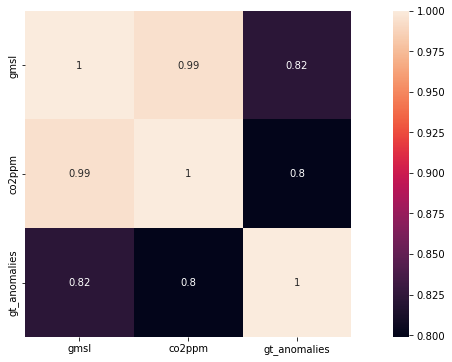

In [3150]:
plt.figure(figsize=(15,6))
sns.heatmap(gslr.corr(), square=True, annot=True)

# Model Implementation

## FB Prophet

### Preping dataframe according to the specified requirements of FB Prophet

#### date should be renamed as 'ds' and target as 'y'

In [3151]:
df_final=gslr.rename({'date':'ds','gmsl':'y'},axis='columns')
df_final.head(5)

,ds,y,co2ppm,gt_anomalies
0,1993-01-01,-48.0,356.37,0.36
1,1993-02-01,-46.6,356.40,0.38
2,1993-03-01,-46.3,356.51,0.41
3,1993-04-01,-43.8,356.66,0.31
4,1993-05-01,-45.7,356.72,0.35


### Splitting dataset for training and testing

In [3152]:
df_final_train = df_final[:300]
df_final_test = df_final[300:]

df_final_test_plt = df_final[300:]
df_final_test = df_final_test.drop(columns=['y'])


### model initialization and fitting

In [3153]:
model_fbp_regressor = fbprophet.Prophet(yearly_seasonality=True, interval_width=0.95,changepoint_prior_scale = 0.03)

# Using add_regressor to include other features
for column in df_final.columns:
    if column != 'ds' and column != 'y':
        print(column)
        model_fbp_regressor.add_regressor(column)

model_fbp_regressor.fit(df_final_train)
print()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


co2ppm
gt_anomalies
Initial log joint probability = -3.80461



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       713.895    0.00486956       148.484           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       715.644    0.00182367       134.189   1.153e-05       0.001      235  LS failed, Hessian reset 
     199       716.136   0.000150708       101.228           1           1      308   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       716.205   0.000567985       163.347   4.782e-06       0.001      368  LS failed, Hessian reset 
     299       716.363   2.31415e-07       110.647      0.1734      0.6863      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       716.363   2.89786e-06       98.3868   2.749e-08       0.001      529  LS failed, Hessian reset 
     327       716.363   1.97845e-08  

### Model predictions/ forecasts of test set

In [3154]:
forecast_preds = model_fbp_regressor.predict(df_final_test)
forecast_preds = forecast_preds[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [3155]:
forecast_preds.head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,42.216432,37.530187,47.232828
1,2018-02-01,42.699651,38.051176,47.058275
2,2018-03-01,43.679720,39.139463,48.359712
3,2018-04-01,43.709246,39.097840,48.445989
4,2018-05-01,43.488996,38.862989,48.051922


### Plotting of forecast

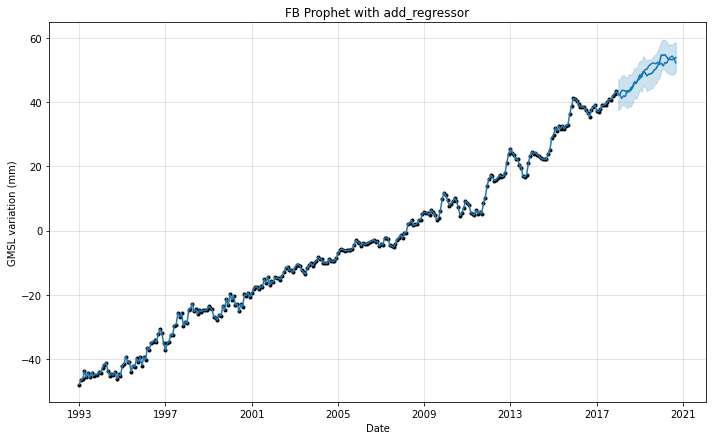

In [3156]:
model_fbp_regressor.plot(forecast_preds, uncertainty = True)
plt.plot(df_final.ds,df_final.y)
plt.title('FB Prophet with add_regressor')
plt.xlabel('Date')
plt.ylabel('GMSL variation (mm)')
print()

### Lineplot with upper and lower bounds of testset forecast data vs actual data

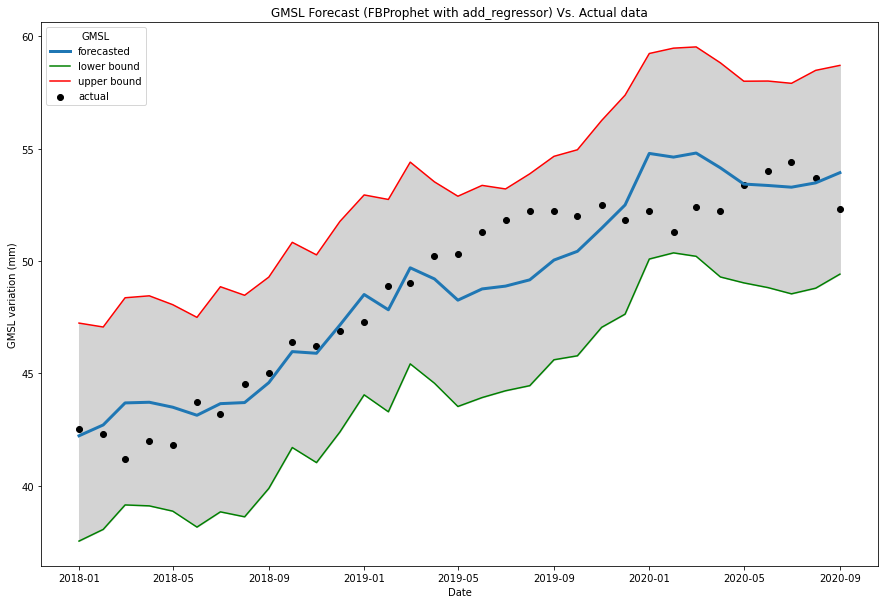

In [3157]:
plt.figure(figsize=(15,10))

plt.plot(forecast_preds.ds, forecast_preds['yhat'], label = 'forecasted', linewidth = 3)
plt.plot(forecast_preds.ds, forecast_preds['yhat_lower'], c = 'green', label = 'lower bound')
plt.plot(forecast_preds.ds, forecast_preds['yhat_upper'], c = 'red', label = 'upper bound')
plt.fill_between(forecast_preds.ds, forecast_preds['yhat_lower'],forecast_preds['yhat_upper'],interpolate=False,color='lightgray')
plt.scatter(df_final_test_plt.ds, df_final_test_plt.y, c = 'black', label = 'actual')
plt.legend(title ='GMSL')
plt.title(label = 'GMSL Forecast (FBProphet with add_regressor) Vs. Actual data')
plt.xlabel('Date')
plt.ylabel('GMSL variation (mm)')
print()

## FBProphet without add_regressor

In [3158]:
model_no_regressor = fbprophet.Prophet(yearly_seasonality=True, interval_width=0.95, changepoint_prior_scale = 0.02)

model_no_regressor.fit(df_final_train)
print()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.80461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       669.957   4.84751e-05       153.609           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       671.761   0.000186717        150.02      0.5727      0.5727      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       673.227   3.78116e-05        157.88   2.332e-07       0.001      354  LS failed, Hessian reset 
     299       673.239   1.05124e-06        154.59      0.3706     0.03706      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       673.324   0.000220731       149.664   1.227e-06       0.001      497  LS failed, Hessian reset 
     399       673.355    4.8576e-05       150.245      0.3748           1      610   
    Iter      log pro

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [3159]:
forecast = model_no_regressor.predict(df_final_test)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
28,2020-05-01,53.386371,48.298199,58.362796
29,2020-06-01,53.505460,48.654253,58.857297
30,2020-07-01,53.447804,48.343841,58.434473
31,2020-08-01,53.664475,48.616821,58.673187
32,2020-09-01,54.012370,48.760267,59.299759


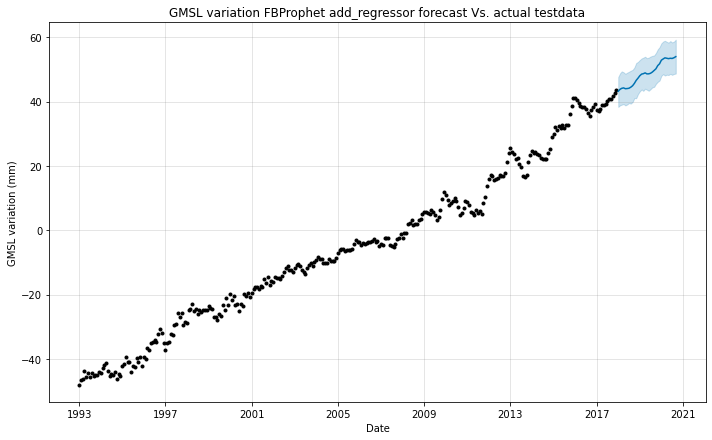

In [3160]:
fig1 = model_no_regressor.plot(forecast, uncertainty = True)

plt.title('GMSL variation FBProphet add_regressor forecast Vs. actual testdata')
plt.xlabel('Date')
plt.ylabel('GMSL variation (mm)')
print()

GMSL variation FBProphet add_regressor forecast analysis of testdata



/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


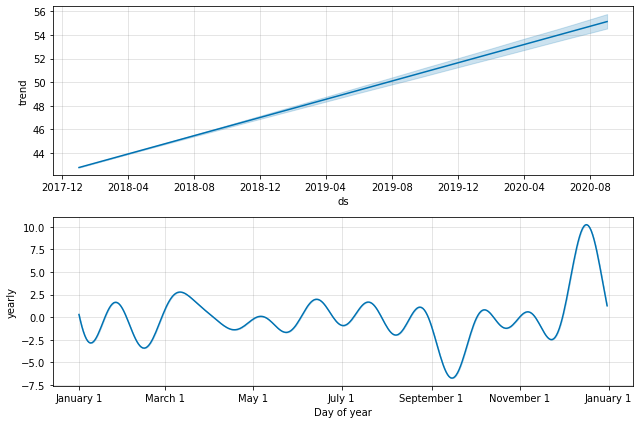

In [3161]:
fig2 = model_no_regressor.plot_components(forecast)
print('GMSL variation FBProphet add_regressor forecast analysis of testdata')
print()

### Line plot of forecast with lower and upper bounds Vs. actual test data

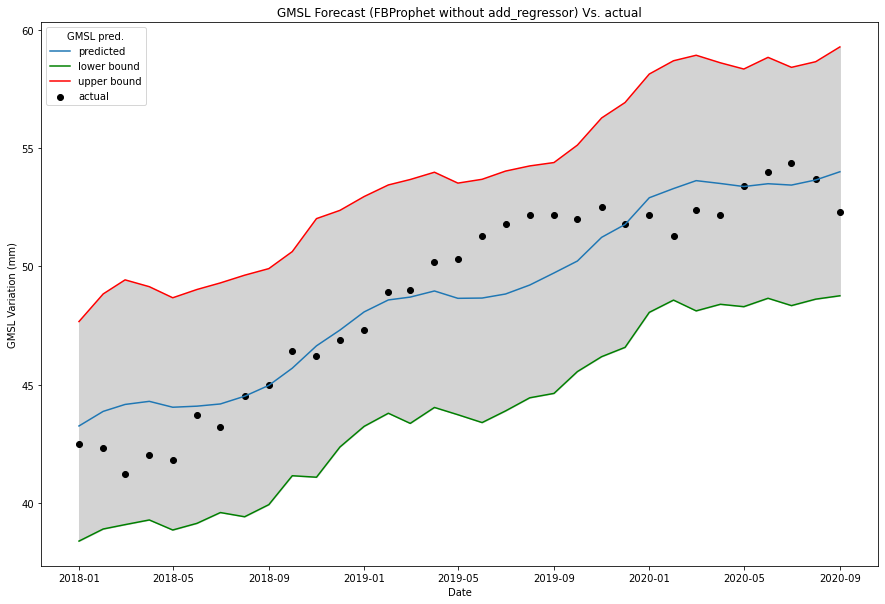

In [3162]:
plt.figure(figsize=(15,10))

plt.plot(forecast.ds, forecast['yhat'], label = 'predicted')
plt.plot(forecast.ds, forecast['yhat_lower'], c = 'green', label = 'lower bound')
plt.plot(forecast.ds, forecast['yhat_upper'], c = 'red', label = 'upper bound')
plt.fill_between(forecast.ds, forecast['yhat_lower'],forecast['yhat_upper'],interpolate=False,color='lightgray')
plt.scatter(df_final_test_plt.ds, df_final_test_plt.y, c = 'black', label = 'actual')
plt.legend(title ='GMSL pred.')
plt.title(label = 'GMSL Forecast (FBProphet without add_regressor) Vs. actual')
plt.xlabel('Date')
plt.ylabel('GMSL Variation (mm)')
print()

# Now let's try to forecast future values for CO2 and Global Temperature Anomalies to use them for forecasting GMSL future values with add_regressor

### Step-1 FBProphet for co2ppm without add_regressor

In [3163]:
df_final_co2ppm = df_final[['ds','co2ppm']]
df_final_co2ppm = df_final_co2ppm.rename(columns={'co2ppm':'y'})

df_final_train = df_final_co2ppm[:300]
df_final_test = df_final_co2ppm[300:]

df_final_test_plt = df_final_co2ppm[300:]
df_final_test = df_final_test.drop(columns=['y'])

In [3164]:
co2_model_no_regressor = fbprophet.Prophet(yearly_seasonality=True, interval_width=0.80,changepoint_prior_scale = 0.012)

co2_model_no_regressor.fit(df_final_train)
print()

forecast = co2_model_no_regressor.predict(df_final_test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.01955


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1980.45    0.00150942       9890.91           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2007.56    0.00524647       9726.04           1           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2022.79    0.00566962       29228.1           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2034.47   6.37401e-05       20568.3      0.1038           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2041.49   1.27459e-05       3090.84      0.5138      0.5138      562   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [3165]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,406.595486,406.286337,406.893513
1,2018-02-01,406.791995,406.499165,407.095526
2,2018-03-01,406.982350,406.700946,407.285696
3,2018-04-01,407.200300,406.871848,407.517442
4,2018-05-01,407.414075,407.099928,407.716398


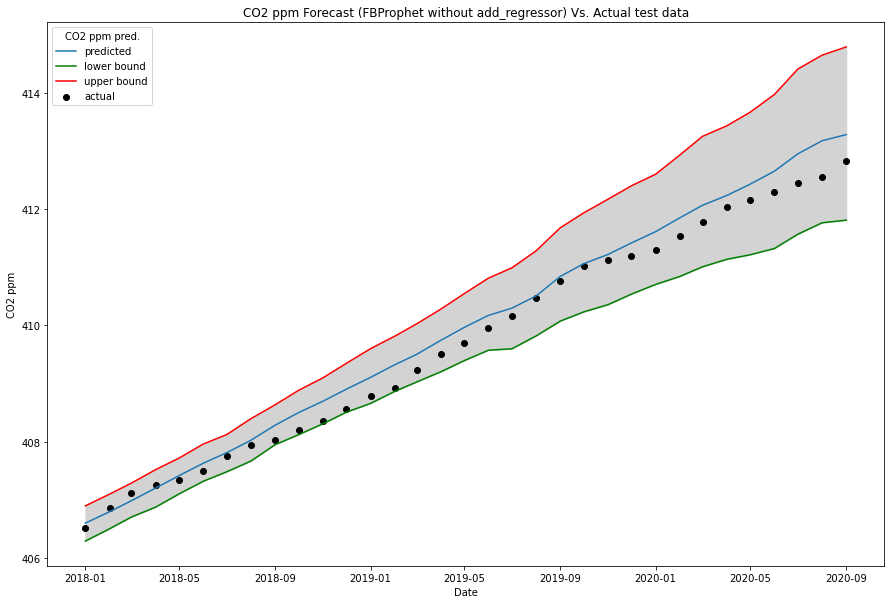

In [3166]:
plt.figure(figsize=(15,10))

plt.plot(forecast.ds, forecast['yhat'], label = 'predicted')
plt.plot(forecast.ds, forecast['yhat_lower'], c = 'green', label = 'lower bound')
plt.plot(forecast.ds, forecast['yhat_upper'], c = 'red', label = 'upper bound')
plt.fill_between(forecast.ds, forecast['yhat_lower'],forecast['yhat_upper'],interpolate=False,color='lightgray')
plt.scatter(df_final_test_plt.ds, df_final_test_plt.y, c = 'black', label = 'actual')
plt.legend(title ='CO2 ppm pred.')
plt.title(label = 'CO2 ppm Forecast (FBProphet without add_regressor) Vs. Actual test data')
plt.xlabel('Date')
plt.ylabel('CO2 ppm')
print()

## Step-2 FBProphet for gt_anomalies without add_regressor

In [3167]:
df_final_gt = df_final[['ds','gt_anomalies']]
df_final_gt = df_final_gt.rename(columns={'gt_anomalies':'y'})
df_final_train = df_final_gt[:300]
df_final_test = df_final_gt[300:]

df_final_test_plt = df_final_gt[300:]
df_final_test = df_final_test.drop(columns=['y'])

In [3168]:
gt_model_no_regressor = fbprophet.Prophet(yearly_seasonality=True, interval_width=0.95,changepoint_prior_scale=0.01)

gt_model_no_regressor.fit(df_final_train)
print()

forecast = gt_model_no_regressor.predict(df_final_test)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = component


Initial log joint probability = -3.53825
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      61       545.351   7.40435e-09       470.343      0.3727      0.3727       87   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [3169]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,0.850741,0.591274,1.095276
1,2018-02-01,0.895631,0.647134,1.135929
2,2018-03-01,0.937032,0.685587,1.183862
3,2018-04-01,0.891303,0.625868,1.146138
4,2018-05-01,0.865171,0.602188,1.123284


Text(0, 0.5, 'GT_Anomalies')

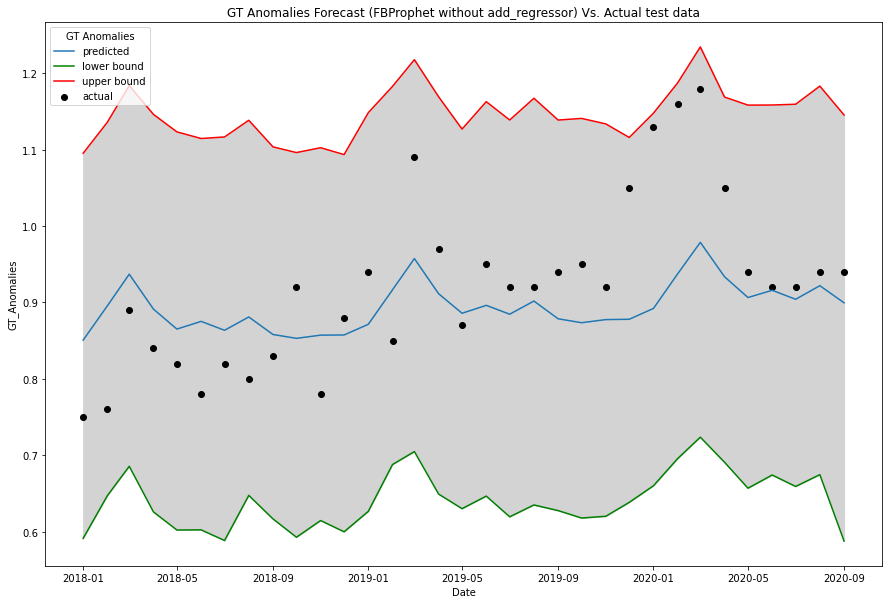

In [3170]:
plt.figure(figsize=(15,10))

plt.plot(forecast.ds, forecast['yhat'], label = 'predicted')
plt.plot(forecast.ds, forecast['yhat_lower'], c = 'green', label = 'lower bound')
plt.plot(forecast.ds, forecast['yhat_upper'], c = 'red', label = 'upper bound')
plt.fill_between(forecast.ds, forecast['yhat_lower'],forecast['yhat_upper'],interpolate=False,color='lightgray')
plt.scatter(df_final_test_plt.ds, df_final_test_plt.y, c = 'black', label = 'actual')
plt.legend(title ='GT Anomalies')
plt.title(label = 'GT Anomalies Forecast (FBProphet without add_regressor) Vs. Actual test data')
plt.xlabel('Date')
plt.ylabel('GT_Anomalies')

## Step-3 FBProphet model with generated regressor values of CO2 and GT_Anomalies

### Generate future dates

In [3171]:
# future_values = model.make_future_dataframe(periods=36, freq='MS')
# future_values.head()
future_values = pd.date_range(start = "2020-10-01", periods=72, freq="MS")
future_values = pd.DataFrame(future_values, columns=['ds'])
future_values.tail(10)

,ds
62,2025-12-01
63,2026-01-01
64,2026-02-01
65,2026-03-01
66,2026-04-01
67,2026-05-01
68,2026-06-01
69,2026-07-01
70,2026-08-01
71,2026-09-01


## FBProphet model initialization for future dates forecast

### For FB Prophet model that uses add_regressor of other features

In [3172]:
fbp_regressor_future =  fbprophet.Prophet(yearly_seasonality=True, interval_width=0.90,changepoint_prior_scale = 0.03)

# Adding regressors
for column in df_final.columns:
    if column != 'ds' and column != 'y':
        fbp_regressor_future.add_regressor(column)

fbp_regressor_future.fit(df_final)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.21434


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       848.449   0.000165903       96.7482      0.5964      0.5964      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       849.145   0.000616666       227.953   3.518e-06       0.001      216  LS failed, Hessian reset 
     199       849.698   4.22218e-05       86.3614      0.8156      0.8156      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     259       850.137   0.000728044       198.838   3.874e-06       0.001      419  LS failed, Hessian reset 
     299       850.235   0.000170024       129.773      0.2479           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396       851.072   0.000830537        149.01   5.786e-06       0.001      616  LS failed, Hessian reset 
     399       851.125   0.000436588  

## CO2 future value generation fbprophet model

In [3173]:
co2_model_no_regressor_future = fbprophet.Prophet(yearly_seasonality=True, interval_width=0.80, changepoint_prior_scale = 0.012)
co2_model_no_regressor_future.fit(df_final_co2ppm)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.02097


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2216.37     0.0158761       42043.1           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2241.74   0.000430252       9626.73           1           1      220   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2255.88   8.78435e-05       3654.33           1           1      328   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2269.34   3.60684e-06       1224.17           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2285.08   8.24059e-06       2982.16           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [3174]:
forecast = co2_model_no_regressor_future.predict(future_values)
print(forecast)
future_values['co2ppm'] = pd.DataFrame(forecast.yhat)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


           ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0  2020-10-01  413.367828  413.040091  413.616999   413.367828   413.367828   
1  2020-11-01  413.581325  413.300319  413.878690   413.581325   413.581325   
2  2020-12-01  413.787935  413.501494  414.089836   413.786901   413.787935   
3  2021-01-01  414.001432  413.739781  414.297210   413.986461   414.010784   
4  2021-02-01  414.214930  413.898247  414.514653   414.183417   414.240668   
..        ...         ...         ...         ...          ...          ...   
67 2026-05-01  427.403537  422.371160  432.006315   422.498407   432.002029   
68 2026-06-01  427.617034  422.664918  432.228884   422.566491   432.294562   
69 2026-07-01  427.823644  422.671799  432.492367   422.645440   432.538987   
70 2026-08-01  428.037141  422.710953  432.911560   422.694594   432.835692   
71 2026-09-01  428.250638  423.146335  433.128103   422.822893   433.156893   

    additive_terms  additive_terms_lower  additive_

## GT Anomalies future value generation fbprophet model

In [3175]:
gt_model_no_regressor_future =  fbprophet.Prophet(yearly_seasonality=True, interval_width=0.95,changepoint_prior_scale=0.01)
gt_model_no_regressor_future.fit(df_final_gt)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -3.63685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       613.186   9.79671e-05       526.077           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       613.188   6.50449e-06       570.666   1.317e-08       0.001      199  LS failed, Hessian reset 
     133       613.193   9.04576e-09       442.143      0.4543      0.4543      234   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


In [3176]:
forecast = gt_model_no_regressor_future.predict(future_values)
future_values['gt_anomalies'] = pd.DataFrame(forecast.yhat)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


## Generated Future Values (yhat)

In [3177]:
future_values.head(10)

,ds,co2ppm,gt_anomalies
0,2020-10-01,413.324329,0.902718
1,2020-11-01,413.582787,0.900574
2,2020-12-01,413.804382,0.908996
3,2021-01-01,414.017175,0.923238
4,2021-02-01,414.196610,0.960300
5,2021-03-01,414.411702,1.010811
6,2021-04-01,414.611099,0.960784
7,2021-05-01,414.811853,0.929069
8,2021-06-01,415.029745,0.937851
9,2021-07-01,415.259080,0.927938


## Model forecast

In [3178]:
fbp_pred_future_regressor = fbp_regressor_future.predict(future_values)

fbp_pred_future_regressor[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

fbp_pred_future_regressor_predictions = fbp_pred_future_regressor[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

fbp_pred_future_regressor_predictions.to_csv('fbp_pred_future_regressor_predictions.csv')


fbp_pred_future_regressor_predictions.head(15)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
0,2020-10-01,55.304807,51.459379,59.054945
1,2020-11-01,55.721663,51.959582,59.483291
2,2020-12-01,57.221984,53.281194,60.871387
3,2021-01-01,56.649596,52.951114,60.403524
4,2021-02-01,57.783901,54.087419,61.704534
5,2021-03-01,57.895051,54.254647,61.741625
6,2021-04-01,57.992929,54.404259,62.148101
7,2021-05-01,57.930286,54.023445,61.507588
8,2021-06-01,58.150815,54.153961,61.593799
9,2021-07-01,58.148788,54.301721,61.541945


## FB Prophet built-in plotting of forecasts and analysis of trends

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


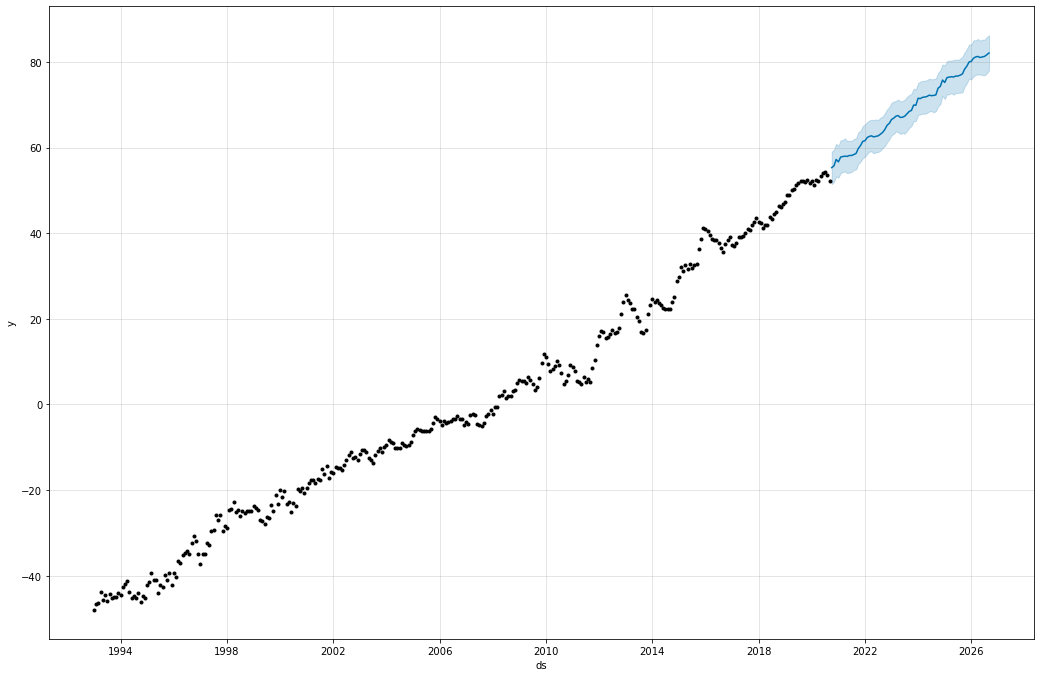

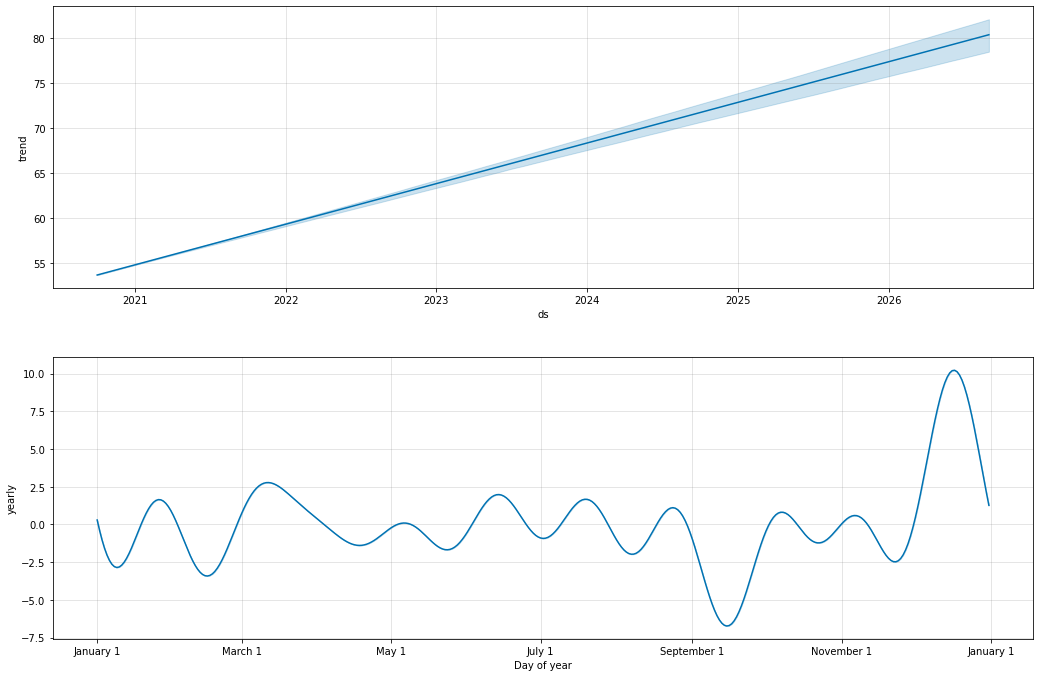

In [3179]:
fig1 = fbp_regressor_future.plot(fbp_pred_future_regressor, uncertainty = True)
fig1.set_figheight(10)
fig1.set_figwidth(15)
fig2 = model_no_regressor.plot_components(fbp_pred_future_regressor, uncertainty = True)
fig2.set_figheight(10)
fig2.set_figwidth(15)

## Merging initial dataset and forecast dataset and save as .csv

In [3180]:
final_dataset = fbp_pred_future_regressor[['ds','yhat']].rename(columns={'ds':'date','yhat':'gmsl'})
future_values = future_values.rename(columns={'ds':'date'})
future_values['gmsl'] = final_dataset['gmsl']

final_dataset = pd.concat([gslr,future_values]).reset_index(drop=True).round(2)

final_dataset
final_dataset.to_csv("forecast_data.csv")

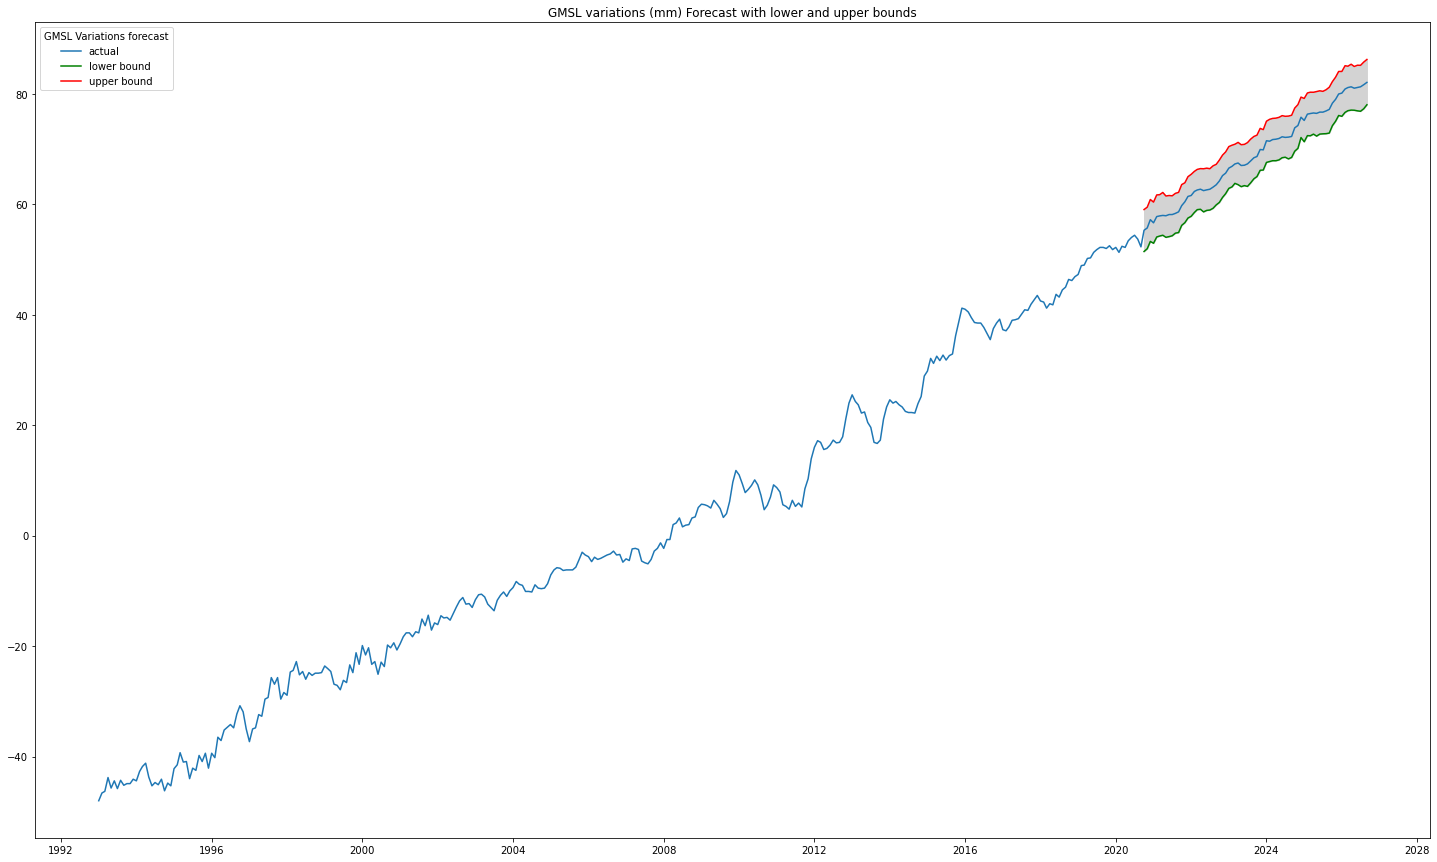

In [3181]:
plt.figure(figsize =(25, 15))
plt.plot(final_dataset.date, final_dataset.gmsl, label= 'actual')
plt.plot(fbp_pred_future_regressor.ds, fbp_pred_future_regressor['yhat_lower'], c = 'green', label = 'lower bound')
plt.plot(fbp_pred_future_regressor.ds, fbp_pred_future_regressor['yhat_upper'], c = 'red', label = 'upper bound')
plt.fill_between(fbp_pred_future_regressor.ds, fbp_pred_future_regressor['yhat_lower'],fbp_pred_future_regressor['yhat_upper'],interpolate=False,color='lightgray')
plt.legend(title = 'GMSL Variations forecast')
plt.title("GMSL variations (mm) Forecast with lower and upper bounds")
print()

# Model Evaluation

### The Prophet library makes it possible to divide our historical data into training data and testing data for cross validation. The main concepts for cross validation with Prophet are:

-  ### Training data (initial): The amount of data set aside for training, the first parameter.
- ### Cutoff (period): A forecast is made for every observed point between cutoff and cutoff + horizon.
- ### Horizon: The data set aside for validation. Here we chose 365 days, which is 1 year.

### The resulting data frame can now be used to compute error measures of yhat vs. y. 

In [3182]:
cutoffs = pd.to_datetime(['2000-02-01', '2002-08-01', '2004-05-01'])
df_cv = cross_validation(fbp_regressor_future, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)



Initial log joint probability = -86.9894
Iteration  1. Log joint probability =    128.933. Improved by 215.922.
Iteration  2. Log joint probability =    182.429. Improved by 53.4958.
Iteration  3. Log joint probability =    188.811. Improved by 6.38164.
Iteration  4. Log joint probability =    211.147. Improved by 22.3363.
Iteration  5. Log joint probability =    211.374. Improved by 0.227163.
Iteration  6. Log joint probability =    211.526. Improved by 0.15236.
Iteration  7. Log joint probability =    211.753. Improved by 0.226516.
Iteration  8. Log joint probability =    211.924. Improved by 0.171335.
Iteration  9. Log joint probability =     212.02. Improved by 0.0957398.
Iteration 10. Log joint probability =    212.226. Improved by 0.206253.
Iteration 11. Log joint probability =     212.52. Improved by 0.293334.
Iteration 12. Log joint probability =    212.523. Improved by 0.00319625.
Iteration 13. Log joint probability =    212.746. Improved by 0.222892.
Iteration 14. Log joint 

/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
 33%|███▎      | 1/3 [00:01<00:03,  1.59s/it]/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is depre

Initial log joint probability = -2.1717
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      46       304.242   0.000103307       125.608   8.202e-07       0.001      104  LS failed, Hessian reset 
      86       304.263   9.01099e-05       124.444   5.497e-07       0.001      198  LS failed, Hessian reset 
      99       304.268   3.77603e-06       109.551      0.3273           1      218   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       304.863    0.00722029        150.83           1           1      335   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       305.653   0.000490707       130.896   3.788e-06       0.001      477  LS failed, Hessian reset 
     299       305.718   1.93788e-05       102.405      0.6516      0.6516      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

 67%|██████▋   | 2/3 [00:02<00:01,  1.03s/it]/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.263
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       367.708     0.0014599       109.214       1.569       0.525      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       369.321    2.7441e-05       132.531           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       369.374    0.00013005       142.001   8.911e-07       0.001      346  LS failed, Hessian reset 
     276       369.393     2.636e-06       101.814   2.141e-08       0.001      466  LS failed, Hessian reset 
     299       369.393   4.01484e-08       103.983           1           1      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       369.393   9.80608e-09        92.265      0.4436      0.4436      508   
Optimization terminated

100%|██████████| 3/3 [00:02<00:00,  1.08it/s]


### FB Prophet comes with some built-in performance metrics. 

### The performance metrics available are:

- Mse: mean absolute error
- Rmse: mean squared error
- Mae: Mean average error
- Mape: Mean average percentage error
- Mdape: Median average percentage error

In [3183]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,31 days,0.728211,0.853353,0.746579,0.067252,0.062522,1.000000
1,60 days,11.026309,3.320589,2.513062,0.142506,0.126174,0.666667
2,61 days,10.839651,3.292363,2.303535,0.122995,0.121807,0.666667
3,90 days,2.528558,1.590144,1.267298,0.079292,0.107714,1.000000
4,92 days,2.290606,1.513475,1.230500,0.077820,0.091481,1.000000


In [3184]:
df_p.mean()

horizon     194 days 02:00:00
mse                  6.209608
rmse                 2.317222
mae                  1.884162
mape                 0.136569
mdape                0.126251
coverage             0.777778
dtype: object

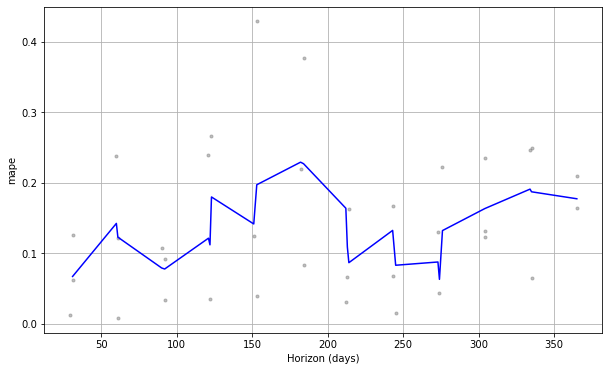

In [3185]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Metrics Analysis

### mean percentage average error of ~13%, which is satisfying for a small monthly dataset. 

# Conclusion

#### As checked in the first model, we can see that prophet performs better with regressor and changepoint_prior_scale hyperparameter tuning.
For inorder to add regressors we need to have respective feature data along with target data, we have taken an approcah where we predict values of regressor features for future dates and combine them together to form a dataset that can enable the model to use regressor.

- We have predicted values of regressor features co2ppm and gt_anomalies with fbprophet.
- There is a clear indication that the trend for gmsl is upward and co2ppm and gt_anomalies have influence on the gmsl.
- There is a ~6 mm (+ - 2mm) increase in sea level variation each year according to model forecasts. 